In [2]:
import numpy as np
from sklearn import linear_model,datasets,metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

In [15]:
#all_author 的特征提取后，训练的模型
# 所有作者风格是否匹配

# pca测试 用pos特征值观察
# 1）不要作者名字
# 2）观察降维变化趋势

def model_fit2(train,test):
    train_data = pd.read_csv(train)
    train_data.drop(['Unnamed: 0'], axis=1,inplace=True)
    test_data = pd.read_csv(test)
    test_data.drop(['Unnamed: 0'], axis=1,inplace=True)
    
    pca = PCA(n_components=0.9)
    
    X_train = train_data.iloc[:,0:-22]
    y_train = train_data.ix[:,-1]
    reduced_X_train = pca.fit_transform(X_train)
#     print(X_train.shape[1])
#     print(reduced_X_train.shape[1])
    
    pca.fit(X_train,y_train)
    ratio=pca.explained_variance_ratio_
    print("pca.components_",pca.components_.shape)
    #print("pca.components_",pca.components_)
    print("pca_var_ratio",pca.explained_variance_ratio_.shape)
    n_pcs= pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    initial_feature_names = X_train.columns
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
    df = pd.DataFrame(sorted(dic.items()))
    print(df)
    
    # print(Y_train)
    X_test = test_data.iloc[:,0:-22]
    reduced_X_test = pca.fit_transform(X_test)
    y_test = test_data.ix[:,-1]
    

    from sklearn.linear_model import  LinearRegression
    LR = LinearRegression()
    LR = ElasticNet(random_state=0)
    ### 对训练数据进行拟合训练
    LR.fit(reduced_X_train, y_train)


    ### 输出参数,分别是截距（intercept_）和权重参数(coef_）
    print('LR.intercept:\n',LR.intercept_)
    print('LR.coef:\n',LR.coef_)
    ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
    print('R^2:\n',LR.score(reduced_X_test,y_test))
    ### 根据测试数据计算预测值y_predict
    y_predict=LR.predict(reduced_X_test)
    ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
    print ("MSE:",metrics.mean_squared_error(y_test,y_predict))
    ### RMSE为均方根误差
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


    print('y_predict:\n',y_predict[0:5])    ### 输出预测值前5行
    print('y_test:\n',y_test[0:5])          ### 输出测试值前5行
    plt.scatter(y_test,y_predict,c='b',alpha=0.5,marker='*')   
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)   ### 画出y=x这条线
    plt.show()
    


model_fit2("DCLSA/la_dataset_split/all_lemma_train_matrix.csv","DCLSA/la_dataset_split/all_lemma_test_matrix.csv")

D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


pca.components_ (321, 191807)
pca_var_ratio (321,)
         0             1
0      PC1          king
1     PC10           tea
2    PC100           eve
3    PC101         going
4    PC102      governor
5    PC103      gracious
6    PC104      meantime
7    PC105      moreover
8    PC106   independent
9    PC107        august
10   PC108         spark
11   PC109     professor
12    PC11            wo
13   PC110         union
14   PC111     professor
15   PC112         jolly
16   PC113          thou
17   PC114      hospital
18   PC115         build
19   PC116           nay
20   PC117       haughty
21   PC118          pore
22   PC119       colonel
23    PC12             s
24   PC120        coming
25   PC121          papa
26   PC122          horn
27   PC123       certain
28   PC124        modern
29   PC125      eighteen
..     ...           ...
291   PC72    politeness
292   PC73          port
293   PC74         house
294   PC75           don
295   PC76         north
296   PC77            ha

D:\anaconda\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


LR.intercept:
 1889.2246376811595
LR.coef:
 [ 2.16636253e-01 -9.15258299e-01 -7.65905243e-01 -4.96667703e-01
  6.71196042e-01 -1.17423890e+00 -7.22251056e-01  4.02324117e-01
  5.49189531e-01 -4.18858778e-01  2.67323850e-02  6.65653188e-01
 -6.67351269e-01 -1.78010413e-01  2.44526182e-01 -1.08644173e-01
  3.91204213e-01  2.20213775e-01 -3.93433322e-03 -2.16136956e-03
  4.32085159e-01  6.93936718e-01  3.21532129e-02 -3.93285767e-01
  3.42796569e-02  2.49069954e-02 -7.18809439e-02  4.14947152e-01
 -2.05373556e-01  1.78184261e-01  1.25432329e-01  1.08061861e-01
 -4.74617840e-01 -7.47498160e-02 -1.41409847e-01 -9.29741704e-02
  8.03721157e-02 -4.01550224e-03 -1.77126006e-01 -3.08583924e-01
  3.81228301e-02 -2.34970023e-01  2.23399100e-01  3.05567873e-01
 -1.16479227e-01 -8.20123885e-02  2.49627649e-02  2.23638554e-02
 -1.83469535e-01 -2.78917863e-01 -1.81710917e-01 -1.32523832e-01
  3.02747862e-01  1.32194949e-02 -3.42175309e-01  2.39024050e-01
 -1.45645427e-01  3.60169762e-02  1.39434865e-

ValueError: shapes (138,110) and (321,) not aligned: 110 (dim 1) != 321 (dim 0)

In [ ]:
#pos类型的最主要因素显示
model_fit2("DCLSA/la_dataset_split/all_pos_train_matrix.csv","DCLSA/la_dataset_split/all_pos_test_matrix.csv")

In [1]:
#参数选择版测试
def model_fit3(train,test):
    train_data = pd.read_csv(train)
    train_data.drop(['Unnamed: 0'], axis=1,inplace=True)
    test_data = pd.read_csv(test)
    test_data.drop(['Unnamed: 0'], axis=1,inplace=True)
    

    
    X_train = train_data.iloc[:,0:-22]
    y_train = train_data.ix[:,-1]
    X_test = train_data.iloc[:,0:-22]
    y_test = train_data.ix[:,-1]
    X = X_train.append(X_test)
    y = y_train.append(y_test)

#     print(X_train.shape[1])
#     print(reduced_X_train.shape[1])
    
    #显示主要因素的排名
#     n_pcs= pca.components_.shape[0]
#     most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
#     initial_feature_names = X_train.columns
#     most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
#     dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
#     df = pd.DataFrame(sorted(dic.items()))
#     print(df)
    
    #再次分割数据集，不要随机分哟
#     train_x_reduced=多少行
#      test_x_reduced=多少行

#     #LR = LinearRegression()
#     LR = ElasticNet(random_state=0)
#     ### 对训练数据进行拟合训练
#     LR.fit(reduced_X, y)

    
    
    
    k_range = range(0,20)
    k_scores = []
    for k in k_range:
        pca = PCA(n_components=0.5+k*0.025)
        reduced_X = pca.fit_transform(X)
        pca.fit(X,y)
        ratio=pca.explained_variance_ratio_
        print("pca.components_",pca.components_.shape)
        #print("pca.components_",pca.components_)
        #print("pca_var_ratio",pca.explained_variance_ratio_.shape)
        #LR = LinearRegression()
        LR = ElasticNet(random_state=0)
        ### 对训练数据进行拟合训练
        LR.fit(reduced_X, y)
        n_mse = cross_val_score(LR, reduced_X, y, cv=10, scoring='neg_mean_squared_error')
        k_scores.append(n_mse.mean())
        print("k:"+str(k)+",score:"+str(n_mse.mean()))

    plt.plot(k_range, k_scores)
    plt.xlabel('Value of n_components for PCA')
    plt.ylabel('Cross-Validated MSE of LR')
    plt.show()
    

#     ### 输出参数,分别是截距（intercept_）和权重参数(coef_）
#     print('LR.intercept:\n',LR.intercept_)
#     print('LR.coef:\n',LR.coef_)
#     ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
#     print('R^2:\n',LR.score(reduced_X_test,y_test))
#     ### 根据测试数据计算预测值y_predict
#     y_predict=LR.predict(reduced_X_test)
#     ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
#     print ("MSE:",metrics.mean_squared_error(y_test,y_predict))
#     ### RMSE为均方根误差
#     print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


#     print('y_predict:\n',y_predict[0:5])    ### 输出预测值前5行
#     print('y_test:\n',y_test[0:5])          ### 输出测试值前5行
#     plt.scatter(y_test,y_predict,c='b',alpha=0.5,marker='*')   
#     plt.xlabel('y_test')
#     plt.ylabel('y_predict')
#     plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)   ### 画出y=x这条线
#     plt.show()
    


model_fit3("DCLSA/la_dataset_split/tem/ti_all_pos_train_matrix.csv","DCLSA/la_dataset_split/tem/ti_pos_test_matrix.csv")

NameError: name 'pd' is not defined

In [7]:
train_data = pd.read_csv("DCLSA/la_dataset_split/all_pos_train_matrix.csv")
train_data.drop(['Unnamed: 0'], axis=1,inplace=True)
print(train_data.head())
X_train = train_data.iloc[:,0:-22]
print(X_train.head())

   (  EX  CD  FW  NNS  NNP  POS  WP  VBD  RB  ...    13   14   15   16   17  \
0  1   1   1   1    1    1    1   1    1   1  ...   0.0  0.0  0.0  0.0  0.0   
1  1   1   1   1    1    1    1   1    1   1  ...   0.0  1.0  0.0  0.0  0.0   
2  1   1   1   1    1    1    1   1    1   1  ...   0.0  0.0  0.0  0.0  0.0   
3  1   1   1   1    1    1    1   1    1   1  ...   0.0  0.0  0.0  0.0  0.0   
4  0   1   1   1    1    1    1   1    1   1  ...   0.0  0.0  0.0  0.0  0.0   

    18   19   20   21  YEAR  
0  0.0  0.0  0.0  0.0  1882  
1  0.0  0.0  0.0  0.0  1863  
2  0.0  0.0  0.0  0.0  1910  
3  0.0  0.0  0.0  1.0  1856  
4  0.0  0.0  0.0  1.0  1864  

[5 rows x 67 columns]
   (  EX  CD  FW  NNS  NNP  POS  WP  VBD  RB ...   ,  WP$  :  NNPS  SYM  $  \
0  1   1   1   1    1    1    1   1    1   1 ...   1    1  1     1    0  0   
1  1   1   1   1    1    1    1   1    1   1 ...   1    1  1     1    0  1   
2  1   1   1   1    1    1    1   1    1   1 ...   1    1  1     1    0  1   
3  1   1  

pca.components_ [[-1.77484909e-19 -1.73094651e-02 -2.23428835e-01 ... -8.94184677e-02
  -3.65977111e-02 -1.14684954e-02]
 [ 3.27805401e-18 -1.01064569e-02 -4.90849204e-02 ...  1.76697117e-01
   1.94547053e-02 -6.69693895e-03]
 [-1.68358559e-18  1.83420720e-02  1.26475543e-01 ...  2.32084163e-01
   1.67026563e-01  3.48043832e-02]
 ...
 [ 1.44868600e-18 -1.91988157e-02  5.39353342e-04 ...  8.66485370e-02
   1.76965941e-01  6.43001325e-02]
 [-8.02202505e-18 -4.24501340e-03  2.99401685e-03 ...  4.00887017e-02
   1.17558131e-01  7.29963514e-02]
 [ 6.32403925e-18  2.64059374e-02  2.34770189e-02 ... -2.10783256e-01
  -1.53703320e-01 -1.05530413e-01]]
pca_var_ratio [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538]


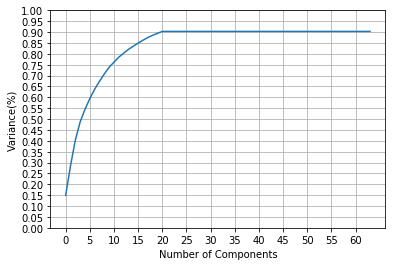

In [6]:
import numpy as np
from sklearn import linear_model,datasets,metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score  # K折交叉验证模块

digits=datasets.load_digits()
X=digits.data
y=digits.target
#pca=PCA( )
pca=PCA(n_components=0.9)
pca.fit(X,y)
ratio=pca.explained_variance_ratio_
#print("pca.components_",pca.components_.shape)
#print("pca_var_ratio",pca.explained_variance_ratio_.shape)
print("pca.components_",pca.components_)
print("pca_var_ratio",pca.explained_variance_ratio_)
#绘制图形
plt.plot([i for i in range(X.shape[1])],
         [np.sum(ratio[:i+1]) for i in range(X.shape[1])])
plt.xticks(np.arange(X.shape[1],step=5))
plt.yticks(np.arange(0,1.01,0.05))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.grid()
plt.show()


   (  EX  CD  FW  NNS  NNP  POS  WP  VBD  RB ...    12   13   14   15   16  \
0  1   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  0.0  0.0  0.0   
1  1   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  1.0  0.0  0.0   
2  1   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  0.0  0.0  0.0   
3  1   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  0.0  0.0  0.0   
4  0   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  0.0  0.0  0.0   

    17   18   19   20   21  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  1.0  

[5 rows x 66 columns]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


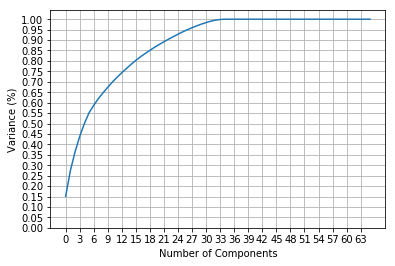

In [19]:
import numpy as np
from sklearn import linear_model,datasets,metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score  # K折交叉验证模块

# digits=datasets.load_digits()
# X=digits.data
# y=digits.target
df=pd.read_csv("DCLSA/la_dataset_split/tem/all_pos_matrix.csv")
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1,inplace=True)
X = df.iloc[:,0:-1]
print(X.head())
y = df.ix[:,-1]
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
ratio=pca.explained_variance_ratio_
plt.plot([i for i in range(X.shape[1])],
         [np.sum(ratio[:i+1]) for i in range(X.shape[1])])
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(X.shape[1],step=3))
plt.yticks(np.arange(0,1.01,0.05))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
#plt.title('Pulsar Dataset Explained Variance')
plt.grid()
plt.show()